<a href="https://colab.research.google.com/github/Rkjha6634/Diwali-sale-Analysis/blob/main/DIWALI_sales_anlaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go


In [3]:
data_set = pd.read_csv('Diwali Sales Data.csv' , encoding= 'unicode_escape')
df  = pd.DataFrame(data_set)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df['Status'].nunique()

0

In [6]:
df.drop(['Status' , 'unnamed1'] , axis=1 , inplace= True)

In [7]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [9]:
df.shape

(11251, 13)

In [8]:
df['Marital_Status'].value_counts()

0    6522
1    4729
Name: Marital_Status, dtype: int64

In [10]:
df['Age Group'].nunique()

7

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [12]:
df['Amount'].isnull().sum()

12

In [13]:
df.dropna(inplace=True)

In [14]:
df['Amount'].isnull().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
df['Amount'] = df['Amount'].astype(int)
print(df['Amount'].dtypes)

int64


In [17]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [18]:
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# EDA

## Gender

In [19]:
df['Gender'].value_counts()

F    7832
M    3407
Name: Gender, dtype: int64

In [21]:
sales_gen = df.groupby('Gender')['Amount'].sum().sort_values().reset_index()
sales_gen


,Gender,Amount
0,M,31913276
1,F,74335853


In [22]:
fig = px.bar(sales_gen, x='Gender', y='Amount', title='Total Male and Female', color = 'Gender' , text= 'Amount' )
fig.show()

From the above garph we see that most buyers are Females as compared to Male

## AGE

In [23]:
df['Age'].value_counts()

30    522
26    494
28    460
29    454
31    448
     ... 
80      8
92      7
70      7
59      7
62      5
Name: Age, Length: 81, dtype: int64

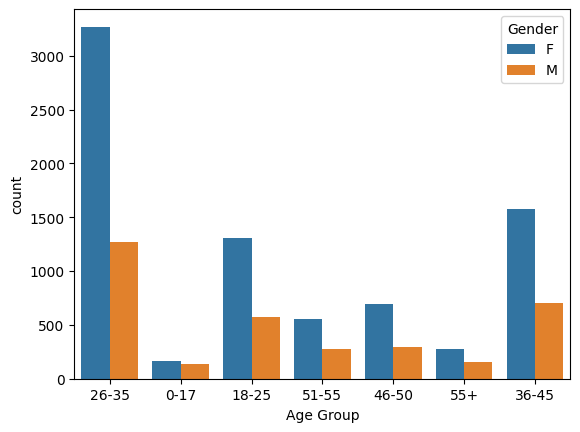

In [24]:
sns.countplot(data = df , x = 'Age Group' , hue= 'Gender')
plt.show()

In [25]:
age_purchase =  df.groupby('Age Group')['Amount'].sum().reset_index()
age_purchase

,Age Group,Amount
0,0-17,2699653
1,18-25,17240732
2,26-35,42613442
3,36-45,22144994
4,46-50,9207844
5,51-55,8261477
6,55+,4080987


In [26]:
fig = px.bar(age_purchase , x='Age Group' , y= 'Amount' , title= 'Pruchases based on age group' , text='Amount' )
fig.show()

From the above two garph we see that the majority of buyers having a better purchase power are between the age
 groups of 26-35 followed by 36-45 and are Female

## State

In [27]:
state_count = df['State'].value_counts()
state_count

Uttar Pradesh       1944
Maharashtra         1525
Karnataka           1304
Delhi               1104
Madhya Pradesh       921
Andhra Pradesh       811
Himachal Pradesh     608
Kerala               453
Haryana              452
Bihar                434
Gujarat              427
Jharkhand            380
Uttarakhand          320
Rajasthan            231
Punjab               200
Telangana            125
Name: State, dtype: int64

In [28]:

fig = px.bar(x=state_count.index, y=state_count.values, title='Count of States' , text=state_count.values)
fig.show()

In [29]:
per_state = df.groupby('State')['Orders'].sum().reset_index()
per_state

,State,Orders
0,Andhra Pradesh,2051
1,Bihar,1062
2,Delhi,2740
3,Gujarat,1066
4,Haryana,1109
5,Himachal Pradesh,1568
6,Jharkhand,953
7,Karnataka,3240
8,Kerala,1137
9,Madhya Pradesh,2252


In [30]:
fig = px.bar(per_state , x='State' , y='Orders' ,title= 'Orders per state' , text= 'Orders')
fig.show()

From above graph we see the most of the purchase is from Uttar Pradesh followed by Maharashtra and Karnataka

## Martial status

In [31]:
df['Marital_Status'].nunique()

2

In [32]:
df['Marital_Status'].value_counts()

0    6518
1    4721
Name: Marital_Status, dtype: int64

In [33]:
marriage_sales = df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
marriage_sales

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


In [34]:
fig = px.bar(marriage_sales, x='Marital_Status', y='Amount', color='Gender',
             title='Sales by Marital Status and Gender')
fig.show()

Here looking at the visuals we can say that the majority of shoppers are married(women) having high purchase power

In [35]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [36]:
df['Occupation'].value_counts()

IT Sector          1583
Healthcare         1408
Aviation           1310
Banking            1137
Govt                854
Hospitality         703
Media               637
Automobile          565
Chemical            541
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             349
Agriculture         283
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Count of Occupations')

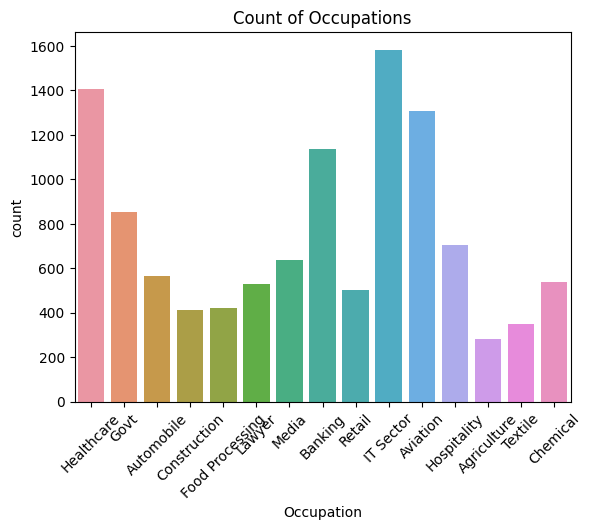

In [37]:
sns.countplot(data= df ,  x='Occupation' )
plt.xticks(rotation=45)
plt.title('Count of Occupations')


In [38]:
occ_sales = df.groupby('Occupation')['Amount'].sum().reset_index()
occ_sales

,Occupation,Amount
0,Agriculture,2593087
1,Automobile,5368596
2,Aviation,12602298
3,Banking,10770610
4,Chemical,5297436
5,Construction,3597511
6,Food Processing,4070670
7,Govt,8517212
8,Healthcare,13034586
9,Hospitality,6376405


In [39]:
fig = px.bar(occ_sales, x='Occupation', y='Amount', title='Sales by Occupation',
             color_discrete_sequence=['#1f77b4', '#ff7f0e'])
fig.show()

from above graph we see that most of the buyers are working in IT industry followed by Healthcare , aviation

## Product category

In [40]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

Text(0.5, 1.0, 'count of products ')

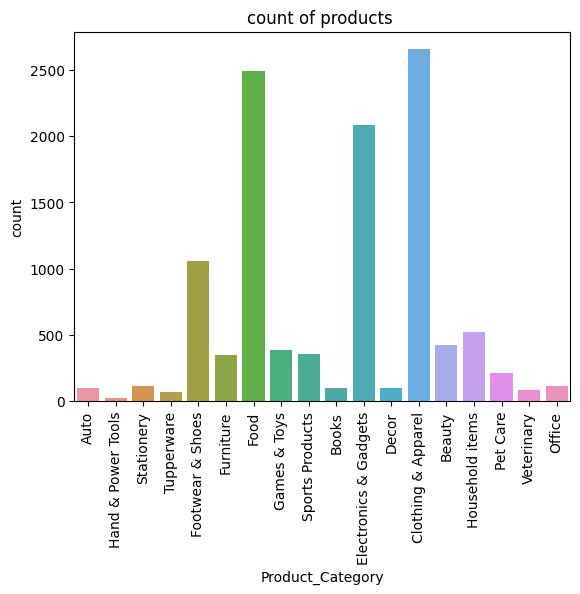

In [41]:
sns.countplot(data= df , x = 'Product_Category')
plt.xticks(rotation=90)
plt.title('count of products ')

In [42]:
prod_sale = df.groupby('Product_Category')['Amount'].sum().reset_index()
prod_sale

,Product_Category,Amount
0,Auto,1958609
1,Beauty,1959484
2,Books,1061478
3,Clothing & Apparel,16495019
4,Decor,730360
5,Electronics & Gadgets,15643846
6,Food,33933883
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Auto'),
  Text(1, 0, 'Beauty'),
  Text(2, 0, 'Books'),
  Text(3, 0, 'Clothing & Apparel'),
  Text(4, 0, 'Decor'),
  Text(5, 0, 'Electronics & Gadgets'),
  Text(6, 0, 'Food'),
  Text(7, 0, 'Footwear & Shoes'),
  Text(8, 0, 'Furniture'),
  Text(9, 0, 'Games & Toys'),
  Text(10, 0, 'Hand & Power Tools'),
  Text(11, 0, 'Household items'),
  Text(12, 0, 'Office'),
  Text(13, 0, 'Pet Care'),
  Text(14, 0, 'Sports Products'),
  Text(15, 0, 'Stationery'),
  Text(16, 0, 'Tupperware'),
  Text(17, 0, 'Veterinary')])

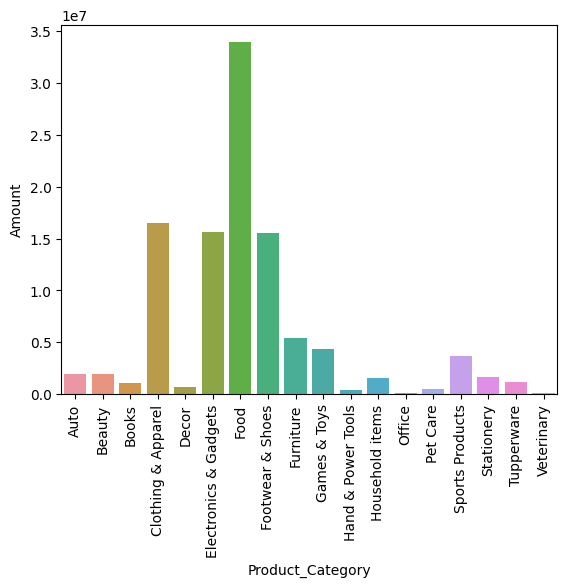

In [43]:
sns.barplot(data=prod_sale , x = 'Product_Category' , y='Amount' )
plt.xticks(rotation=90)

From above visuals we can say that the most product scold were from food category followed by clothing

In [44]:
Id_sales = df.groupby('Product_ID')['Orders'].sum().reset_index().head(10)
Id_sales

,Product_ID,Orders
0,P00000142,57
1,P00000242,15
2,P00000342,16
3,P00000442,1
4,P00000542,6
5,P00000642,30
6,P00000742,19
7,P00000842,4
8,P00001042,19
9,P00001142,16


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'P00000142'),
  Text(1, 0, 'P00000242'),
  Text(2, 0, 'P00000342'),
  Text(3, 0, 'P00000442'),
  Text(4, 0, 'P00000542'),
  Text(5, 0, 'P00000642'),
  Text(6, 0, 'P00000742'),
  Text(7, 0, 'P00000842'),
  Text(8, 0, 'P00001042'),
  Text(9, 0, 'P00001142')])

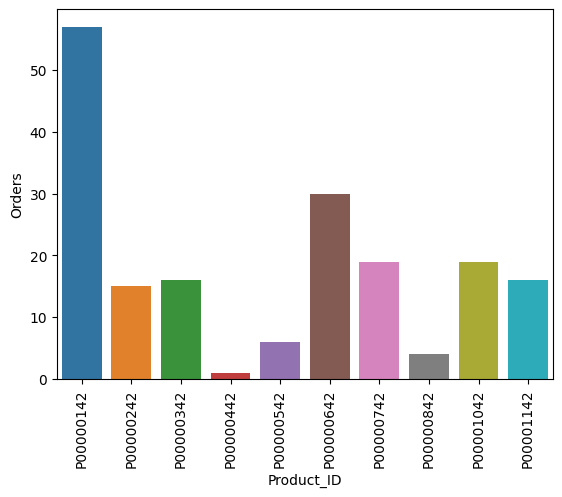

In [45]:
sns.barplot(data= Id_sales , x= 'Product_ID' , y= 'Orders')
plt.xticks(rotation=90)

product_ID p142 was sold the most followed by p642

## CONCLUSION

Married women from the age group 26-35 from UP , Maharatra , Karnataka working in IT , Health care and Aviation are most likly to buy clothes from food ,clothing category